Course Project: ANOVA vs Regression 
=======

### _Group Member: Michelle Corley, Bailee Egan, Madeline Buynak, Yingying Chen_ 

## Content

This porject will focus on the optimal use of experiment units to detect the effect of a treatment statistically.

## Outlines

** Problem 1 ANOVA vs Regression-design experiment** 

* Part A: categorical predictors (antibotics dataset)
* Part B: continous predictors (sugar dataset)

** Problem 2 A statistical power analysis** 

## Problem 1: Part A

** 1) Problem Description** 

A student conducted an experiment evaluating the effect of three different new antibiotics on growth of E.
coli in lab cultures. Using the data in antibiotics.txt, generate a plot that summarizes the results and
test for an effect of antibiotic treatments on the growth of E. coli using an ANOVA-design linear model and
likelihood ratio test.

This dataset describes the effect of sugar on the growth of *E.coli*. In the first column the header is "trt" and has corresponding antibiotics category. In the second column the title is "growth" with the corresponding numbers for growth.

** 2) Pseudocode** 

* Import the necessary packages 
* Load the data
* Generate a plot that summarizes the results 
* Maximum liklihood functions for null hypothesis and ANOVA-design (three levels)     
* Return negative loglikelihood for the null model and alternative model    
* Calculate P value

** 3) Commented Functional Code** 

The cells below shows the code and the output

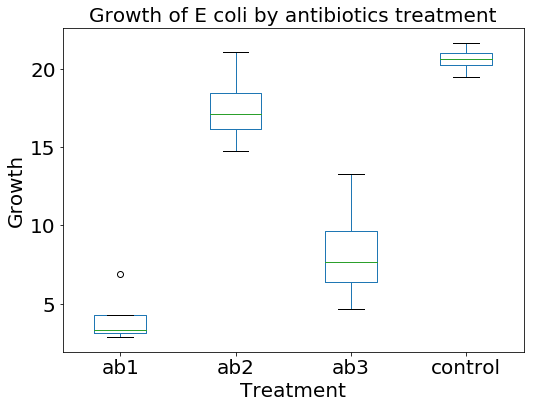

In [92]:
#Import Packages

import pandas
import numpy
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import chi2
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt

# load data
data=pandas.read_csv("antibiotics.csv")

#Create a boxplot

fig=data.boxplot('growth', by='trt', figsize=(8, 6),fontsize=20, grid=False)
fig.set_xlabel('Treatment',fontsize=20)
fig.set_ylabel('Growth',fontsize=20)
plt.title("Growth of E coli by antibiotics treatment",fontsize=20)
plt.suptitle("")

In [93]:
# Custom likelihood function

# null 

def nllike(p,obs):
    B0=p[0]
    sigma=p[1]
    
    expected=B0
    nll=-1*norm(expected,sigma).logpdf(obs).sum()
    return nll

#4-level ANOVA (control, ab1, ab2, and ab3)

def nllike_anova(p,obs):
    B0=p[0]
    B1=p[1]
    B2=p[2]
    sigma=p[3]
    
    expected=B0+B1*obs.x1+B2*obs.x2
    nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
    return nll

In [95]:
# Return negative loglikelihood for the null model and alternative model  

# null

initialGuess=numpy.array([1,1,1])
fit=minimize(nllike,initialGuess,method="Nelder-Mead",options={'disp': True},args=data.growth)
print(fit.fun)

# 4-level ANOVA 

# creat a dataframe according to y values and different antibotics 

ab_3=numpy.diag(numpy.ones(3),0)
zero = numpy.array([[0,0,0]])
ab_3=numpy.concatenate((ab_3, zero))
df_3=pandas.DataFrame(ab_3,columns=['x1', 'x2', 'x3'])
df_3=df_3.append([df_3]*3, ignore_index=True)
df_3=df_3.sort_values(['x1','x2','x3'], ascending=[1,1,1],inplace=False)
df_3=df_3.reset_index(drop=True)
df_3['y']=data.growth

# likelihood 
initialGuess_anova=numpy.array([1,1,1,1,1])
fit_anova=minimize(nllike_anova,initialGuess_anova,method="Nelder-Mead",options={'disp': True},args=df_3)
print(fit_anova.fun)

# calculate p-value 

1-chi2.cdf(x=2*(fit.fun-fit_anova.fun),df=3)

Optimization terminated successfully.
         Current function value: 53.878278
         Iterations: 102
         Function evaluations: 181
53.8782780764
Optimization terminated successfully.
         Current function value: 51.934220
         Iterations: 274
         Function evaluations: 448
51.9342195457


0.27380166637992331

** 4) Conclusions** 

* Here we choose a 95% confidence interval with a significance level of 0.05. From the p-value=0.27, we could not reject the null hypothesis. 
* This is a joint statistic test that tries to test the significance of the effect of all new antibotics on the growth of *E.coli*.
* For the the effect of individual new antibotics on the growth of *E.coli*, we could split the dataset and try to establish a t-test among the control and each antibotic group.  

## Problem 1: Part B

** 1) Problem Description** 

Another student conducted an experiment evaluating the effect of sugar concentration on growth of *E.coli* in lab cultures. Using the data in sugar.txt, generate a plot that summarizes the results and test for an effect of sugar concentration on growth of E. coli using a regression-design linear model and likelihood ratio test.

This dataset describes the effect of sugar on the growth of *E.coli*. In the first column the header is "sugar" and has corresponding amounts of sugar. In the second column the title is "growth" with the corresponding numbers for growth.

** 2) Pseudocode** 

* Import the necessary packages 
* Load the data
* Generate a plot that summarizes the results 
* Make dataframe for maximum liklihood tests    
* Function to return negative loglikelihood for the null and alternative hypothesis
* Define and calculate negative log liklihood value for Alternative model    
* Estimate parameters for Alt
* Same way as for null
* Perform maximum likelihood calculations for D 
* Calculate P value

** 3) Commented Functional Code** 

The cells below shows the code and the output

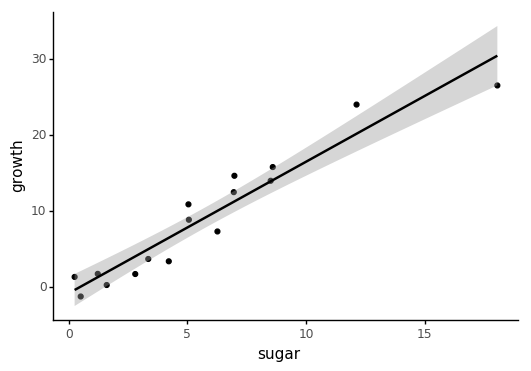

<ggplot: (282454769)>


In [8]:
# Import necessary packages 

import numpy
import pandas 
import scipy
import scipy.integrate as spint
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import chi2
import plotnine
from plotnine import *

#Load Data

data=pandas.read_csv("sugar.csv")
plot1= ggplot(data,aes(x="sugar",y="growth"))+theme_classic()+geom_point()+stat_smooth(method="lm")
print plot1

In [4]:
# Test Null Hypothesis Using Likelihood Ratio Test

dataFrame=pandas.DataFrame({'y':data.growth,'x':data.sugar})

#Define null hypothesis 

def nllikeNull(p,obs):
    B0=p[0]
    sigma=p[1]
    
    expected=B0
    nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
    return nll
    
# estimate parameters by minimizing the NLL for data

initialGuess=numpy.array([15,1])
fitNull=minimize(nllikeNull,initialGuess,method="Nelder-Mead",options={'disp': True},args=dataFrame)
nllNull= fitNull.fun #gives NLL value for null
print("Null model negative log liklihood value = ")
print(nllNull)

Optimization terminated successfully.
         Current function value: 56.241197
         Iterations: 53
         Function evaluations: 103
Null model negative log liklihood value = 
56.2411971986


In [5]:
# Test Alternative Hypothesis Using Likelihood Ratio Test

#Define Alternative

def nllikeAlt(p,obs):
    B0=p[0]
    B1=p[1]
    sigma=p[2]
    
    expectedAlt=B0+B1*obs.x
    nll=-1*norm(expectedAlt,sigma).logpdf(obs.y).sum()
    return nll
    
# estimate parameters by minimizing the NLL for data
initialGuess=numpy.array([0,2,1])
fitAlt=minimize(nllikeAlt,initialGuess,method="Nelder-Mead",options={'disp': True},args=dataFrame)
nllAlt= fitAlt.fun #gives NLL value for null
print("Alternative model negative log liklihood value = ") 
print(nllAlt)

Optimization terminated successfully.
         Current function value: 36.278639
         Iterations: 181
         Function evaluations: 323
Alternative model negative log liklihood value = 
36.2786386193


In [6]:
# Calculate D value
Dval = 2*(nllNull-nllAlt)
print("D-value= ",Dval)

('D-value= ', 39.925117158676699)


In [7]:
# Calculate p value
pval=1-scipy.stats.chi2.cdf(x=Dval,df=1)
print(pval)

2.63887911522e-10


** 4) Conclusions** 

* Here we choose a 95% confidence interval with a significance level of 0.05. From the p-value=2.63887911522e-10, we could reject the null hypothesis and conclude that sugar has an effect on the growth of *E coli* 
* The estimated parameters in the linear model could be found in the fitAlt function. 

## Problem 2

** 1) Problem Description** 

To evaluate the relative statistical power of regression- and ANOVA-design experiments, 10 random
experiments with a regression design and 10 random experiments with a ANOVA-design (2, 4, and 8 levels, respectively) were simulated. The relationship of y and x was defined as beta1 = 0.4 and beta0 = 10 with normal distributed errors whose standard deviation equals to 1, 2, 4, 6, 8, 12, and 24. The p-value for each design and relationship was caculated from likelihood ratio tests. The average p-value across the 10 runs was used as the metric of statistical power.

** 2) Pseudocode** 

* Import necessary packages
* Customer functions for null hypothesis, regression design, ANOVA design of two levels, four levels and eight levels 
* Customer functions for obtaining the metric of statistical power (i.e., the average p-valuve from likelihood ratio tests across the 10 repeated runs) by regression design, ANOVA design of two levels, four levels and eight levels
* Data frame of average p-values under different design and different standard deviation values.

** 3) Commented Functional code** 

The cell below shows the code and the output

In [6]:
# Import necessary packages 
import pandas as pd 
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.stats import chi2

# Customer Function for null hypothesis 

# refer to the course material 

def null(p,obs):
    B0=p[0]
    sigma=p[1]
    
    expected=B0
    nll=-1*norm(expected,sigma).logpdf(obs).sum()
    return nll

# Regression-Customer Function for alternative hypothesis_significant effect between x and y

# refer to the course material
    
def nllike(p,obs1,obs2):
    B0=p[0]
    B1=p[1]
    sigma=p[2]
    expected=B0+B1*obs1
    nll=-1*norm(expected,sigma).logpdf(obs2).sum()
    return nll     

# ANOVA-Customer Function for alternative hypothesis_significant effect between x and y

# 2 levels 
    
def nllike_anova_2(p,obs):
    B0=p[0]
    B1=p[1]
    sigma=p[2]
    expected=B0+B1*obs.x1
    nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
    return nll  


# ANOVA-Customer Function for alternative hypothesis_significant effect between x and y

# 4 levels 
    
def nllike_anova_4(p,obs):
    B0=p[0]
    B1=p[1]
    B2=p[2]
    B3=p[3]
    sigma=p[4]
    expected=B0+B1*obs.x1+B2*obs.x2+B3*obs.x3
    nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
    return nll   


# ANOVA-Customer Function for alternative hypothesis_significant effect between x and y

# 8 levels
    
def nllike_anova_8(p,obs):
    B0=p[0]
    B1=p[1]
    B2=p[2]
    B3=p[3]
    B4=p[4]
    B5=p[5]
    B6=p[6]
    B7=p[7]
    sigma=p[8]
    expected=B0+B1*obs.x1+B2*obs.x2+B3*obs.x3+B4*obs.x4+B5*obs.x5+B6*obs.x6+B7*obs.x7
    nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
    return nll   

# Customer Function for getting mean of p-value from regression design by monte carlo approach

def regression(slope,intercept,sigma,iteration,obs_n):
    p_regression_sum=0
    for i in range(iteration):
        # generate random floats in the range of 0-50, total number=obs_n
        x=np.random.uniform(0,50,obs_n)
        # generate y with standard deviation sigma
        y=slope*x+intercept
        y=y+np.random.randn(24)*sigma
        # get the likelihood of null hypothesis 
        initialGuess_null=np.array([1,1])
        fit_null=minimize(null,initialGuess_null,method="Nelder-Mead",options={'disp':False},args=y)
        # get the likelihood of alternative hypothesis
        initialGuess=np.array([1,1,1])
        fit=minimize(nllike,initialGuess,method="Nelder-Mead",options={'disp':False},args=(x,y))
        # calculate the p-value
        p_tmp=1-chi2.cdf(x=2*(fit_null.fun-fit.fun),df=1) 
        p_regression_sum=p_tmp+p_regression_sum
    # calculate the average of p-value after iteration 
    p_regression=p_regression_sum/iteration
    return p_regression

# Customer Function for getting p-value from anova (level 2) by monte carlo approach

# x matrix
 
treatment_2=np.diag(np.ones(1),0)
zero = np.array([[0]])
treatment_2=np.concatenate((treatment_2, zero))
treatment_2=np.tile(treatment_2,(12,1))
df_2=pd.DataFrame(treatment_2,columns=['x1'])

def anova_2(slope,intercept,sigma,iteration):
    p_anova_sum=0
    for i in range(iteration):
        # set two levels-level 1 (x=1), level 2 (x=40)
        x=np.array([1,40])
        x=np.tile(x,(1,12))
        # generate y with standard deviation sigma
        y=slope*x+intercept+np.random.randn(24)*sigma
        y=y.reshape(-1)
        # append the y to the x data frame
        df_2['y']=y
        # get the likelihood of null hypothesis 
        initialGuess_null=np.array([1,1])
        fit_null=minimize(null,initialGuess_null,method="Nelder-Mead",options={'disp':False},args=y)
        # get the likelihood of alternative hypothesis
        initialGuess=np.array([1,1,1])
        fit=minimize(nllike_anova_2,initialGuess,method="Nelder-Mead",options={'disp':False},args=df_2)
        # calculate the p-value, note here the df=level-1
        p_tmp=1-chi2.cdf(x=2*(fit_null.fun-fit.fun),df=1) 
        p_anova_sum=p_tmp+p_anova_sum
        # calculate the average of p-value after iteration 
    p_anova=p_anova_sum/iteration
    return p_anova   

# Customer Function for getting p-value from anova (level 4) by monte carlo approach

# x matrix
    
treatment_4=np.diag(np.ones(3),0)
zero = np.array([[0,0,0]])
treatment_4=np.concatenate((treatment_4, zero))
treatment_4=np.tile(treatment_4,(6,1))
df_4=pd.DataFrame(treatment_4,columns=['x1', 'x2', 'x3'])


def anova_4(slope,intercept,sigma,iteration):
    p_anova_sum=0
    for i in range(iteration):
        # set four levels-level 1 (x=1), level 2 (x=10), level 3 (x=30), level 4 (x=40)
        x=np.array([1,10,30,40])
        x=np.tile(x,(1,6))
        # generate y with standard deviation sigma
        y=slope*x+intercept+np.random.randn(24)*sigma
        y=y.reshape(-1)
        # append the y to the x data frame
        df_4['y']=y 
        # get the likelihood of null hypothesis 
        initialGuess_null=np.array([1,1])
        fit_null=minimize(null,initialGuess_null,method="Nelder-Mead",options={'disp':False},args=y)
        # get the likelihood of alternative hypothesis
        initialGuess=np.array([1,1,1,1,1])
        fit=minimize(nllike_anova_4,initialGuess,method="Nelder-Mead",options={'disp':False},args=df_4)
        # calculate the p-value, note here the df=level-1
        p_tmp=1-chi2.cdf(x=2*(fit_null.fun-fit.fun),df=3) 
        p_anova_sum=p_tmp+p_anova_sum
    # calculate the average of p-value after iteration 
    p_anova=p_anova_sum/iteration
    return p_anova   

# Customer Function for getting p-value from anova (level 8) design by monte carlo approach

# x matrix
    
treatment_8=np.diag(np.ones(7),0)
zero = np.array([[0,0,0,0,0,0,0]])
treatment_8=np.concatenate((treatment_8, zero))
treatment_8=np.tile(treatment_8,(3,1))
df_8=pd.DataFrame(treatment_8,columns=['x1', 'x2', 'x3', 'x4', 'x5','x6','x7'])

        
def anova_8(slope,intercept,sigma,iteration):
    p_anova_sum=0
    for i in range(iteration):
        # set eight levels-level 1 (x=1), level 2 (x=7), level 3 (x=13), level 4 (x=19), level 5 (x=25), level 6 (x=31), level 7 (x=37), level 8 (x=48)
        x=np.array([1,7,13,19,25,31,37,48])
        x=np.tile(x,(1,3))
        # generate y with standard deviation sigma
        y=slope*x+intercept+np.random.randn(24)*sigma
        y=y.reshape(-1)
        # append y to the x data frame
        df_8['y']=y        
        # get the likelihood of null hypothesis 
        initialGuess_null=np.array([1,1])
        fit_null=minimize(null,initialGuess_null,method="Nelder-Mead",options={'disp':False},args=y)
        # get the likelihood of alternative hypothesis
        initialGuess=np.array([1,1,1,1,1,1,1,1,1])
        fit=minimize(nllike_anova_8,initialGuess,method="Nelder-Mead",options={'disp':False},args=df_8)
        # calculate the p-value, note here the df=level-1
        p_tmp=1-chi2.cdf(x=2*(fit_null.fun-fit.fun),df=7) 
        p_anova_sum=p_tmp+p_anova_sum
    # calculate the average of p-value after iteration 
    p_anova=p_anova_sum/iteration
    return p_anova   

In [7]:
# Compare the p-value from the regression design and anova design 

# slope=0.4; Intercept=10; iteration=10; obs_n (total experiment units)=24
# for the anova design, three levels 2,4,8 were choosen 
# standard deviation were selected to be 1,2,4,6,8,12,24


level=[2,4,8]
sigma=[1,2,4,6,8,12,24]

# present the power analysis by summarizing all the average P values in a data frame 

index=['regression','2 level','4 level','8 level']
p_df=pd.DataFrame(index=index,columns=sigma)
# fill the p-value of regression design under each sigma
for i in range(7):
    p_df.iloc[0,i]=regression(0.4,10,sigma[i],10,24)
    p_df.iloc[1,i]=anova_2(0.4,10,sigma[i],10)
    p_df.iloc[2,i]=anova_4(0.4,10,sigma[i],10)    
    p_df.iloc[3,i]=anova_8(0.4,10,sigma[i],10)
# print the p-value table for two different designs, where the anova design has three different levels 2,4,8    
p_df

,1,2,4,6,8,12,24
regression,0,3.87568e-13,1.65307e-06,0.00424198,0.00945166,0.123556,0.147717
2 level,0,6.88338e-16,5.26829e-07,1.24485e-05,3.70294e-05,0.00760886,0.0659968
4 level,0,3.002e-12,7.29087e-07,0.0108358,0.0117717,0.0113336,0.553484
8 level,0.00690397,0.0179396,0.0772567,0.312772,0.355031,0.402233,0.557921


** 4) Conclusions** 

* Here we choose a 95% confidence interval with a significance level of 0.05.
* In the range of small standard deviation (1-6), the ANOVA design and the regression design work both efficiently and could identify the relationship significantly. However, with the increasing of standard deviation, the ANOVA design (especially two and four levels) works better than the regression design. Noticably, ANOVA design of 8 levels always performs the worst among all the combinations. 
* The relative perfomance depends on the design of numbers of levels under choosen conditions. This manifests especially when the standard deviation varies from 1 to 24, which sounds reasonable as for the same replicates under a level, the data will enjoy large enough variances that lead to the insignificance of the relationship.  